In [2]:
import pandas as pd
import scipy
from scipy.optimize import leastsq
import datetime
from matplotlib import pyplot
from scipy.stats import chisquare
import os
import numpy as np
import requests

# Import the package
import covid_fit
# ...and what we need for the analysis
from covid_fit.fit_utilities import FitterTimeSeries, FitterTimeSeriesComparison, download_csv

In [5]:
source_data = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19'\
                +'/master/dati-placeholder/dpc-covid19-ita-placeholder.csv'
df = download_csv(source_data, 'regioni')

In [6]:
tm = FitterTimeSeries(df, 'data'
                      , select = {'denominazione_regione':['Lazio','Lombardia','Emilia-Romagna']}
                      , multiseries_on = 'denominazione_regione'
                     )

# tm = FitterTimeSeries(df, 'data'
#                       , select = {'denominazione_provincia':['Napoli', 'Caserta']}
#                       , multiseries_on = 'denominazione_provincia'
#                      )

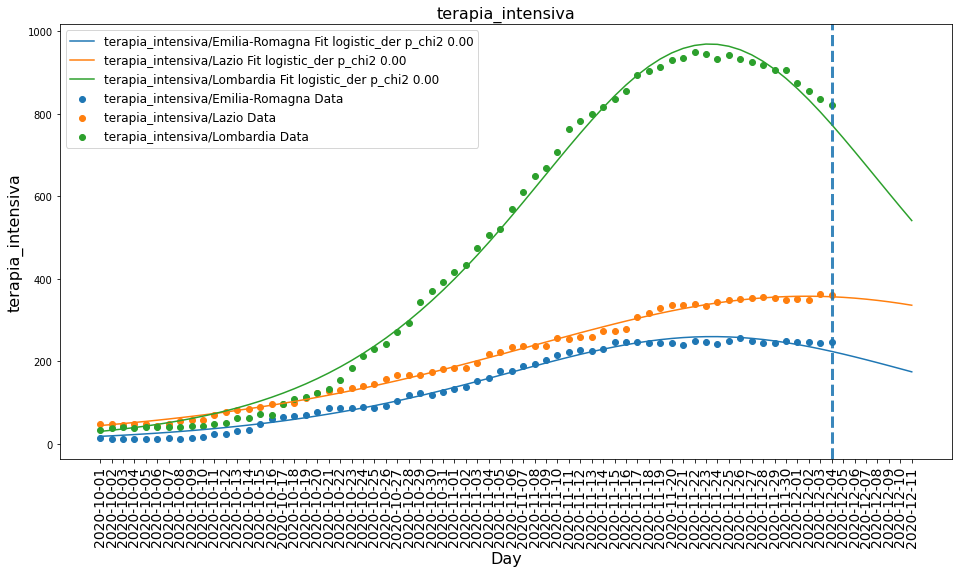

In [7]:
summary = tm.fit_time_series(['terapia_intensiva'] , 
                               start_date = '2020-10-01',end_date =None, n_previsions=7,
                             model ='logistic_der', show_test=True, semilog=False, plot=True)

In [8]:
tmc=FitterTimeSeriesComparison(df, 'data'
                    , select = {'denominazione_regione':['Emilia-Romagna']}
                       ,multiseries_on = 'denominazione_regione'
                              )

gompertz
logistic_der


/home/roberto/large_storage/documenti/1_Programming_Languages/Python/DEV_Python/pkgs/covid_project/covid_fit/fit_functions/funcs.py:6: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-a*np.exp(-b*x))
/home/roberto/large_storage/documenti/1_Programming_Languages/Python/DEV_Python/pkgs/covid_project/covid_fit/fit_functions/funcs.py:6: RuntimeWarning: overflow encountered in multiply
  return c*np.exp(-a*np.exp(-b*x))


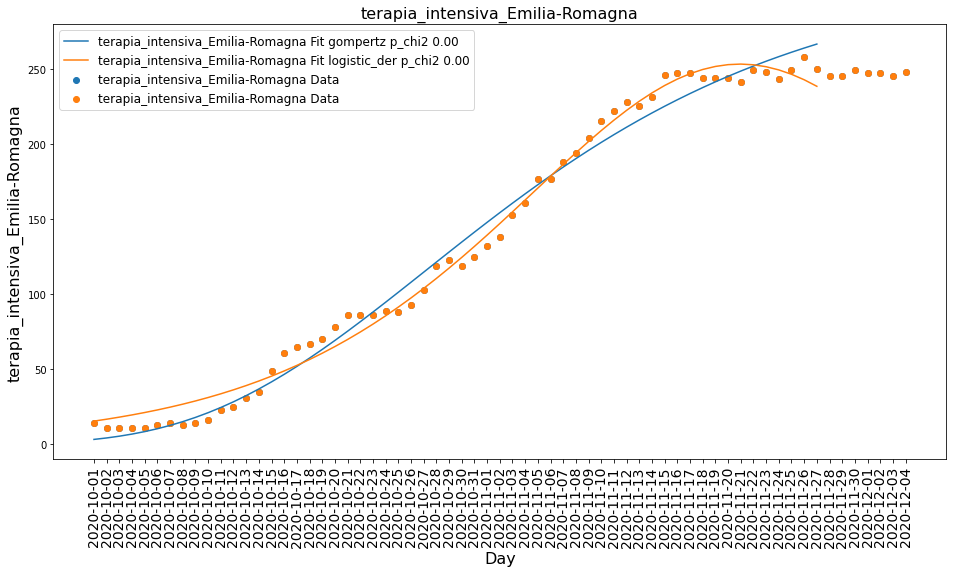

gompertz
logistic_der


/home/roberto/large_storage/documenti/1_Programming_Languages/Python/DEV_Python/pkgs/covid_project/covid_fit/fit_functions/funcs.py:6: RuntimeWarning: overflow encountered in exp
  return c*np.exp(-a*np.exp(-b*x))


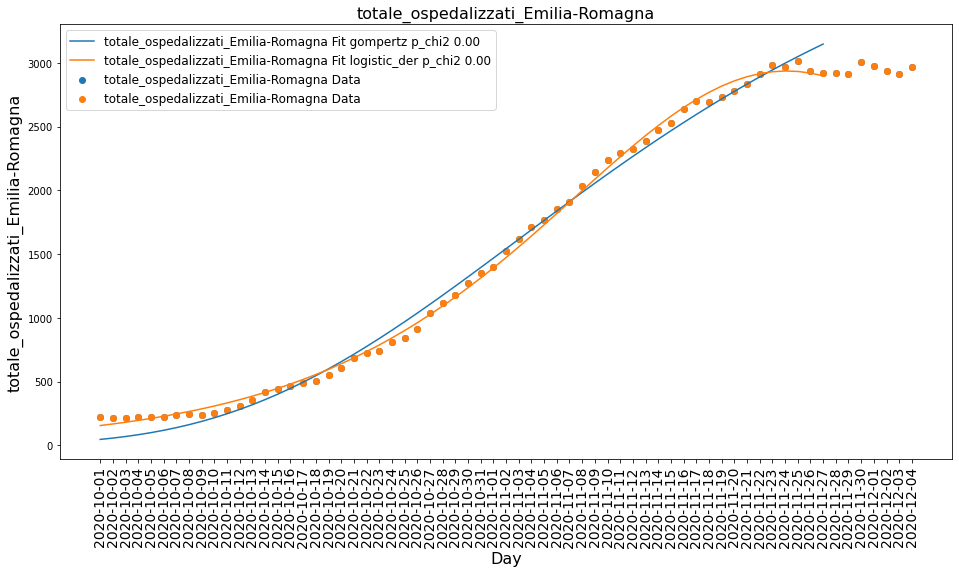

In [9]:
summary = tmc.fit_time_series_comparison(['terapia_intensiva','totale_ospedalizzati'] ,
                               start_date = '2020-10-01',end_date ='2020-11-27', n_previsions=0,
                             model = ['gompertz', 'logistic_der'], show_test=True, semilog=False)